In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

The sourcec code obtained from https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

In [3]:
df = pd.read_csv('news.csv')

In [4]:
df.shape

(6335, 4)

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [7]:
df['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [8]:
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [9]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train_pa) 
tfidf_test = tfidf_vectorizer.transform(X_test_pa)

In [10]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train_pa)
#DataFlair - Predict on the test set and calculate accuracy
y_pred_pa = pac.predict(tfidf_test)
score = accuracy_score(y_test_pa, y_pred_pa)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


Data clean-up, delete missing datas from news.csv and save to news_clean.csv

**這段跑一次即可，不然會出現錯誤訊息，因為已經原資料已經修改過了

In [11]:
empty = []
for i in range(len(df.text)):
    if(df.text[i] == ' '):
        empty.append(i)
df = df.drop(empty)
df = df.drop(columns = ['Unnamed: 0'])
df.reset_index(drop=True)
df.to_csv('News_clean.csv')
# Save cleaned data to news_clean.csv
df_new = pd.read_csv('News_clean.csv').drop(columns = ['Unnamed: 0'])
df_new.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
df_new.shape

(6299, 3)

In [13]:
label= df_new.label
label.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [14]:
df_new['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6294    The State Department told the Republican Natio...
6295    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6296     Anti-Trump Protesters Are Tools of the Oligar...
6297    ADDIS ABABA, Ethiopia —President Obama convene...
6298    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6299, dtype: object

In [15]:
#Text preprocessing
stop_words = set(stopwords.words('english'))
def clean(text):
    # Lower letters
    text = text.lower()
    # Remove numbers
    text = re.sub('[^a-zA-Z]',' ',text)
    word_token = word_tokenize(text)
    filtered_sentence = []
    for wordtoken in word_token:
        if wordtoken not in stop_words:
            filtered_sentence.append(wordtoken)
    # Join the words
    text = (' '.join(filtered_sentence))
    return text


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Jean/nltk_data'
    - 'C:\\Users\\Jean\\.conda\\envs\\py36\\nltk_data'
    - 'C:\\Users\\Jean\\.conda\\envs\\py36\\share\\nltk_data'
    - 'C:\\Users\\Jean\\.conda\\envs\\py36\\lib\\nltk_data'
    - 'C:\\Users\\Jean\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [16]:
df_new['text'] = df_new['text'].apply(clean)
df_new['text']

0       daniel greenfield shillman journalism fellow f...
1       google pinterest digg linkedin reddit stumbleu...
2       u secretary state john f kerry said monday sto...
3       kaydee king kaydeeking november lesson tonight...
4       primary day new york front runners hillary cli...
                              ...                        
6294    state department told republican national comm...
6295    p pbs stand plutocratic pentagon posted oct wi...
6296    anti trump protesters tools oligarchy reform a...
6297    addis ababa ethiopia president obama convened ...
6298    jeb bush suddenly attacking trump matters jeb ...
Name: text, Length: 6299, dtype: object

In [17]:
# Count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_new['text'].values)
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
y = df_new['label'].values
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [19]:
# Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
mlf = MultinomialNB()
mlf.fit(X_train, y_train)
print('Accuracy on train data:',mlf.score(X_train, y_train))
print('Accuracy on test data:',mlf.score(X_test, y_test))



Accuracy on train data: 0.9357015280809684
Accuracy on test data: 0.9063492063492063


In [22]:
y_pred = mlf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1260 points : 118


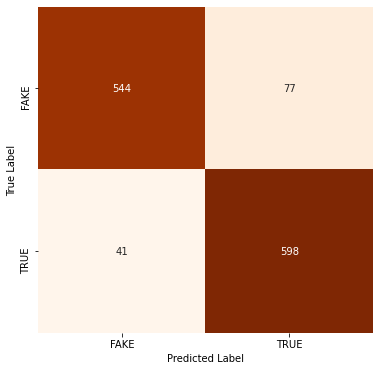

In [23]:
# Confution Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Oranges, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1]:
classification_report(y_test, y_pred)

NameError: name 'classification_report' is not defined

In [25]:
text = 'The inauguration of Joe Biden as the 46th president of the United States took place on January 20, 2021, marking the start of the four-year term of Joe Biden as president and Kamala Harris as vice president. The 59th presidential inauguration took place on the West Front of the United States Capitol in Washington, D.C. Biden took the presidential oath of office, before which Harris took the vice presidential oath of office.       '
text = clean(text)
v_text = vectorizer.transform([text]).toarray()
mlf.predict(v_text)

array(['REAL'], dtype='<U4')